<a href="https://colab.research.google.com/github/keatrean/projects/blob/master/swearwords_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade torch transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('train.csv')
print(data.head())
print(data['label'].value_counts())

   ID                                               text  label
0   0  Брюки отличные, качественные, но к сожалению к...      0
1   1  Отличный аппарат, в комплекте кабель и работет...      0
2   2                            Супер 👍 спасибо большое      0
3   3  Получил быстро данные наушники! К наушникам пр...      0
4   4                 Всё дошло в целости и сохранности)      0
label
0    210461
1     29698
Name: count, dtype: int64


<ipython-input-5-eda0952ec468>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


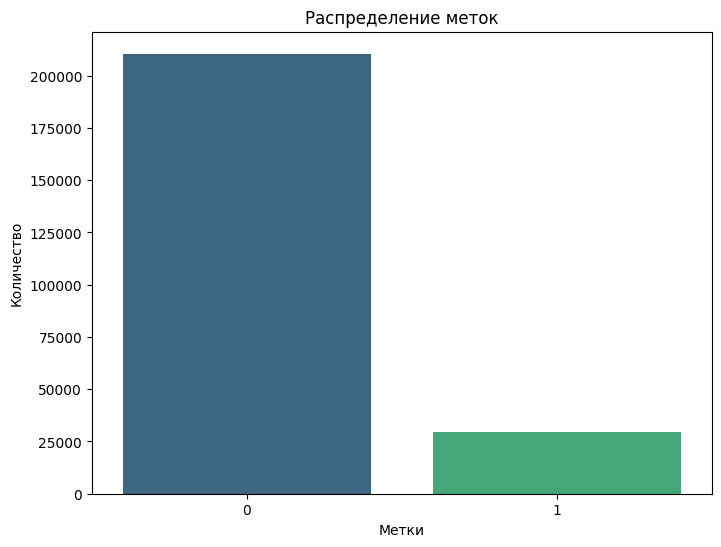

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = data['label'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

plt.title('Распределение меток')
plt.xlabel('Метки')
plt.ylabel('Количество')

plt.show()

# Предобработка

In [ ]:
!pip install transliterate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.7 MB/s eta 0:00:00


In [ ]:
import spacy
from spacy import load
from spacy.lang.ru.examples import sentences
from spacy.lang.ru import Russian
from transliterate import translit
import re
from nltk.corpus import stopwords
import nltk

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords_ru = stopwords.words("russian")

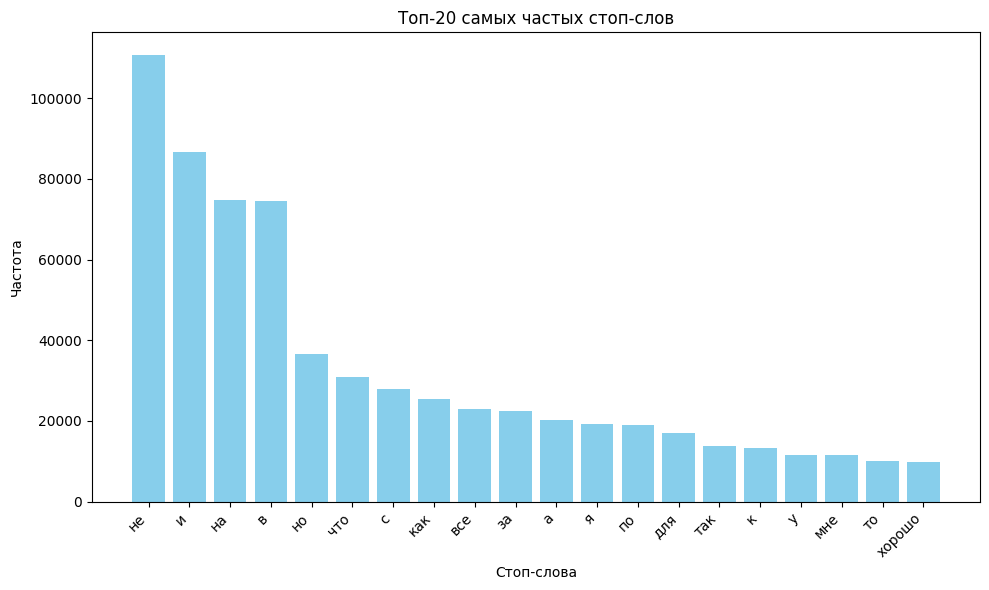

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text_data = data['text']

# Функция для подсчета стоп-слов
def count_stopwords(texts, stopwords):
    stopword_counts = Counter()
    for text in texts:
        words = text.lower().split()  # Преобразуем в список слов
        stopword_counts.update(word for word in words if word in stopwords)
    return stopword_counts

# Подсчет стоп-слов
stopword_counts = count_stopwords(text_data, stopwords_ru)

# Преобразуем в словарь для удобства
stopword_freq = dict(stopword_counts)

# Выбираем топ-20 самых частых стоп-слов
most_common = stopword_counts.most_common(20)

# Разделяем на слова и частоты
words, frequencies = zip(*most_common)

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xticks(rotation=45, ha='right')  # Поворот подписей для удобства
plt.title('Топ-20 самых частых стоп-слов')
plt.xlabel('Стоп-слова')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

In [ ]:
def preprocess(text):
  text = text.lower()
  text = translit(text, 'ru')
  text = delete_long_seq(text)
  tokens = get_letters_and_numbers(text)
  tokens = delete_stopwords(tokens)
  text = " ".join(tokens)

  return text

def delete_long_seq(text):
    # удаление повторяющихся >3 раз символов
    pattern = re.compile(r"(.)\1{2,}")
    new_text = pattern.sub(r"\1", text)
    return new_text

def get_letters_and_numbers(text):
    # tokens = re.findall(r'[а-яё]+(?:[.-][а-яё]*)?', text)
    tokens = [re.sub(r'[^а-яё0-9]', '', word) for word in text.split()]
    return tokens

def delete_stopwords(tokens):
    tokens = [
        token for token in tokens
        if token not in stopwords_ru
    ]
    return tokens

In [ ]:
my_text = 'полнейшее х. тонкая 2022г., хлипкая и тд. выкинул!'
preprocess(my_text)

'полнейшее х тонкая 2022г хлипкая тд выкинул'

In [ ]:
data['clean_text'] = data['text'].apply(preprocess)
data.head()

,ID,text,label,clean_text
0,0,"Брюки отличные, качественные, но к сожалению к...",0,брюки отличные качественные сожалению коротко ...
1,1,"Отличный аппарат, в комплекте кабель и работет...",0,отличный аппарат комплекте кабель работетт сет...
2,2,Супер 👍 спасибо большое,0,супер спасибо большое
3,3,Получил быстро данные наушники! К наушникам пр...,0,получил быстро данные наушники наушникам пришё...
4,4,Всё дошло в целости и сохранности),0,всё дошло целости сохранности


# Отдельно проводится лемматизация текста

In [ ]:
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 86.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import ru_core_news_sm
nlp_ru = ru_core_news_sm.load()

In [ ]:
lemma = []

for doc in nlp_ru.pipe(data['clean_text']):
    lemma.append([n.lemma_ for n in doc])
print(lemma[:5])

[['брюки', 'отличный', 'качественный', 'сожаление', 'коротко', 'ваты', 'поэтому', 'отказ', 'обидно', 'продавец', 'рекомендовать', 'весь'], ['отличный', 'аппарат', 'комплекте', 'кабель', 'работетт', 'сеть', ' ', 'значить', 'сразу', 'приступать', 'измерение', 'давление'], ['супер', ' ', 'спасибо', 'большой'], ['получить', 'быстро', 'данные', 'наушник', 'наушник', 'прийти', 'прикольный', 'чехол', 'проблема', 'подключение'], ['всё', 'дойти', 'целость', 'сохранность']]


In [ ]:
lemma_as_strings = [' '.join(l) for l in lemma]
lemma_df = pd.DataFrame(lemma_as_strings, columns=['lemmas'])
lemma_df.to_csv('train_lemmas_with_numbers.csv', index=False)

In [ ]:
lemma_df.head()

,lemmas
0,хороший подошкл
1,тонюсенький саженец досмотреть описание годовалый
2,когтеточка хороший ткань основании плохо прикл...
3,затяжка порадовать покупка
4,рекомендовать


In [ ]:
lemma_df = pd.read_csv('train_lemmas_with_numbers.csv', skip_blank_lines=False)
data['clean_text'] = lemma_df['lemmas']
data.head()

,ID,text,label,clean_text
0,0,"Брюки отличные, качественные, но к сожалению к...",0,брюки отличный качественный сожаление коротко ...
1,1,"Отличный аппарат, в комплекте кабель и работет...",0,отличный аппарат комплекте кабель работетт сет...
2,2,Супер 👍 спасибо большое,0,супер спасибо большой
3,3,Получил быстро данные наушники! К наушникам пр...,0,получить быстро данные наушник наушник прийти ...
4,4,Всё дошло в целости и сохранности),0,всё дойти целость сохранность


# Очищаем от пустых строк

In [ ]:
len(data)

240159

In [ ]:
data = data.dropna().reset_index(drop=True)

In [ ]:
len(data)

236828

Сохранение предобработанных данных файл

In [ ]:
data.to_csv('cleaned_train_data.csv', index=False)

In [ ]:
data = pd.read_csv('cleaned_train_data.csv')

In [ ]:
data.head()

,ID,text,label,clean_text
0,0,"Брюки отличные, качественные, но к сожалению к...",0,брюки отличный качественный сожаление коротко ...
1,1,"Отличный аппарат, в комплекте кабель и работет...",0,отличный аппарат комплекте кабель работетт сет...
2,2,Супер 👍 спасибо большое,0,супер спасибо большой
3,3,Получил быстро данные наушники! К наушникам пр...,0,получить быстро данные наушник наушник прийти ...
4,4,Всё дошло в целости и сохранности),0,всё дойти целость сохранность


# Fine-tuning модели rubert-base-cased для задачи бинарной классификации

In [ ]:
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(
    "DeepPavlov/rubert-base-cased",
    num_labels=2
)


pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model_path = "swearwords-text-classification-model"


# Model Checkpoints

The trained model is hosted on [Hugging Face Hub].


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TrainingArguments
import torch

tokenizer = AutoTokenizer.from_pretrained('')

# Загрузка модели
model = AutoModelForSequenceClassification.from_pretrained('')


tokenizer_config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.57M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/918 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

In [ ]:
!pip install evaluate

In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("f1")

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
train_texts, test_texts, train_labels, test_labels = train_test_split(
   data["clean_text"].tolist(), data["label"].tolist(), test_size=0.2, random_state=42
)

In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=64)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=64)

In [ ]:
# Пример текста для токенизации
text = "х ня полный 2022г больше не куплю"

# Токенизация текста
tokenized_output = tokenizer(text, truncation=True, padding=True, max_length=10)  # max_length ограничивает вывод для удобства

# Вывод результата
print("Токены:", tokenizer.convert_ids_to_tokens(tokenized_output['input_ids']))
print("IDs токенов:", tokenized_output['input_ids'])
print("Attention mask:", tokenized_output['attention_mask'])

Токены: ['[CLS]', 'х', 'ня', 'полный', '2022', '##г', 'больше', 'не', 'куп', '[SEP]']
IDs токенов: [101, 883, 118314, 21228, 73190, 848, 8980, 1699, 10320, 102]
Attention mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
from torch.utils.data import Dataset

class CommentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CommentDataset(train_encodings, train_labels)
test_dataset = CommentDataset(test_encodings, test_labels)


Это был эксперимент с взвешиванием классов, показал худшие результаты

In [ ]:
# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np
# train_labels = data['label']
# # Рассчитываем веса классов
# class_weights = compute_class_weight(
#     class_weight='balanced',
#     classes=np.unique(train_labels),
#     y=train_labels
# )
# print("Class Weights:", class_weights)
# class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)

Class Weights: [0.57168376 3.98754041]


In [ ]:
# from torch import nn
# class CustomTrainer(Trainer):
#     def compute_loss(self, model, inputs, return_outputs=False,  **kwargs):
#         labels = inputs.pop("labels")
#         # forward pass
#         outputs = model(**inputs)
#         logits = outputs.get("logits")
#         # compute custom loss for 2 labels with different weights
#         loss_fct = nn.CrossEntropyLoss(weight=class_weights_tensor.to(model.device))
#         loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
#         return (loss, outputs) if return_outputs else loss

In [ ]:
from transformers import TrainingArguments
training_args = TrainingArguments(
    output_dir='./results',
    learning_rate=2e-5,
    eval_strategy ="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    fp16=True,
    gradient_accumulation_steps=4
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,F1
0,0.051800,0.052471,0.950817
1,0.037800,0.050086,0.954027


TrainOutput(global_step=5920, training_loss=0.05193434116002676, metrics={'train_runtime': 2645.153, 'train_samples_per_second': 143.252, 'train_steps_per_second': 2.238, 'total_flos': 1.24606106930304e+16, 'train_loss': 0.05193434116002676, 'epoch': 1.9996622192197264})

In [ ]:
model_path = "swearwords-text-classification-model"
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

('swearwords-text-classification-model/tokenizer_config.json',
 'swearwords-text-classification-model/special_tokens_map.json',
 'swearwords-text-classification-model/vocab.txt',
 'swearwords-text-classification-model/added_tokens.json',
 'swearwords-text-classification-model/tokenizer.json')

In [ ]:
# Получение предсказаний на тестовой выборке
predictions = trainer.predict(test_dataset)
test_preds = np.argmax(predictions.predictions, axis=-1)

# Вычисление F1-score
f1_test = f1_score(test_labels, test_preds)
print(f"F1-Score на тестовой выборке: {f1_test}")


F1-Score на тестовой выборке: 0.9540269027754129


In [ ]:
errors_df = pd.DataFrame()
errors_df['true_label'] = test_labels
errors_df['pred_label'] = test_preds
errors_df['clean_text'] = test_texts

errors_df.head()

,true_label,pred_label,clean_text
0,0,0,отличный шлёпанец просто класс
1,0,0,отличный саженец
2,1,1,это подделка бушидо короткий говно низкий каче...
3,1,1,прийти какой гово страшный персонаж строшнее с...
4,0,0,хорошия вдобная когтеточкп кот абажают заказ...


In [ ]:
errors = errors_df[errors_df['true_label'] != errors_df['pred_label']]

print("Количество ошибок:", len(errors))
errors_sorted = errors.sort_values(by='true_label', ascending=True)
errors_sorted.to_csv('errors_v5.csv', columns=[ 'true_label', 'pred_label', 'clean_text'], index=False)

Количество ошибок: 540


#Обработка тестовых данных для подачи submission на Kaggle

In [ ]:
competition_data = pd.read_csv('test.csv')

In [ ]:
competition_data['clean_text'] = competition_data['text'].apply(preprocess)

In [ ]:
lemma = []

for doc in nlp_ru.pipe(competition_data['clean_text']):
    lemma.append([n.lemma_ for n in doc])

lemma_as_strings = [' '.join(l) for l in lemma]
lemma_df = pd.DataFrame(lemma_as_strings, columns=['lemmas'])
lemma_df.to_csv('comp_lemmas.csv', index=False)

In [ ]:
lemma_df = pd.read_csv('comp_lemmas.csv', skip_blank_lines=False)
competition_data['clean_text'] = lemma_df
competition_data.head()

,ID,text,clean_text
0,0,"Хороший, подошкл",хороший подошкл
1,1,"Совсем тонюсенький саженец, не досмотрела в оп...",тонюсенький саженец досмотреть описание годовалый
2,2,"Когтеточка хорошая, но вот ткань на основании ...",когтеточка хороший ткань основании плохо прикл...
3,3,"Много затяжек, не порадовала покупка",затяжка порадовать покупка
4,4,Рекомендую 💣,рекомендовать


Строкам, которые после предобработки оказались пустыми, присваивается класс 0, дальше работаю только с непустыми строками

In [ ]:
competition_data['label'] = competition_data['clean_text'].apply(lambda x: 0 if pd.isna(x) or x.strip() == '' else None)
competition_data.head()

,ID,text,clean_text,label
0,0,"Хороший, подошкл",хороший подошкл,NaN
1,1,"Совсем тонюсенький саженец, не досмотрела в оп...",тонюсенький саженец досмотреть описание годовалый,NaN
2,2,"Когтеточка хорошая, но вот ткань на основании ...",когтеточка хороший ткань основании плохо прикл...,NaN
3,3,"Много затяжек, не порадовала покупка",затяжка порадовать покупка,NaN
4,4,Рекомендую 💣,рекомендовать,NaN


In [ ]:
print(competition_data['clean_text'].isna().sum())

851


In [ ]:
empty_texts = competition_data[competition_data['label'] == 0]
empty_texts.head()

,ID,text,clean_text,label
175,175,Շատ լավն է,,0.0
250,250,👎🏻👎🏻,NaN,0.0
292,292,👍👍👍,NaN,0.0
781,781,👍🏽,NaN,0.0
797,797,👍👍👍👍👍👍👍👍👍👍👍👍👍👍,NaN,0.0


In [ ]:
non_empty_texts = competition_data[competition_data['label'].isna()][['ID','clean_text']] # Выбираем только строки с текстом

In [ ]:
non_empty_texts.head()

,ID,clean_text
0,0,хороший подошкл
1,1,тонюсенький саженец досмотреть описание годовалый
2,2,когтеточка хороший ткань основании плохо прикл...
3,3,затяжка порадовать покупка
4,4,рекомендовать


In [ ]:
comp_encodings = tokenizer(non_empty_texts['clean_text'].to_list(), truncation=True, padding=True, max_length=64,return_tensors='pt')

In [ ]:
class TestDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        return item

    def __len__(self):
        return len(self.encodings['input_ids'])

In [ ]:
comp_dataset = TestDataset(comp_encodings)

In [ ]:
predictions = trainer.predict(comp_dataset)
comp_preds = np.argmax(predictions.predictions, axis=-1)

In [ ]:
non_empty_indices = non_empty_texts.index
competition_data.loc[non_empty_indices, 'label'] = comp_preds

In [ ]:
final_data = competition_data[['ID', 'text', 'label']]

final_data.to_csv('submission_texts.csv', index=False)

print(final_data.head())

   ID                                               text  label
0   0                                   Хороший, подошкл    0.0
1   1  Совсем тонюсенький саженец, не досмотрела в оп...    0.0
2   2  Когтеточка хорошая, но вот ткань на основании ...    0.0
3   3               Много затяжек, не порадовала покупка    0.0
4   4                                       Рекомендую 💣    0.0


In [ ]:
competition_data['label'] = competition_data['label'].astype(int)
final_data = competition_data[['ID', 'label']]

final_data.to_csv('submission.csv', index=False)

print(final_data.head())

   ID  label
0   0      0
1   1      0
2   2      0
3   3      0
4   4      0
